1. MNIST
2. DataLoader, Transformation
3. Multilayer Neural Net, activation function
4. Loss and Optimizer
5. Traning Loop(batch training)
6. Model Evaluation
7. GPU support

In [2]:
# import necessay modules
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [3]:
# device config
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 

In [27]:
# hyper parameters
input_size = 784 # this will flatten our image = N*R = 28*28
hidden_size = 500 
num_classes = 10 # digits= [1-9]
num_epochs = 2
batch_size = 100
learnig_rate = .001

In [28]:
class MINISTDataset(Dataset):
    def __init__(self, transform=None):
        # Initialize data, download, etc.
        self.train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)
        self.test_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=False, 
                                           transform=torchvision.transforms.ToTensor())

In [29]:
dataset = MINISTDataset()
train_loader = DataLoader(dataset=dataset.train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=dataset.test_dataset, batch_size=batch_size, shuffle=False)
examples = iter(train_loader)
example_data, example_targets = next(examples)
print(example_data.shape, example_targets.shape) # torch.Size([100, 1, 28, 28]) torch.Size([100])

torch.Size([100, 1, 28, 28]) torch.Size([100])


-  [100, 1, 28, 28]:
    - batch size= 100, color channel=1( no color chanel), width, height
- [100]: so each size has a label

In [43]:
# plot image
import matplotlib.pyplot as plt

def plot_image(data):
    for i in range(6):
        plt.subplot(2,3,i+1) # row, column
        plt.imshow(data[i][0], cmap='gray')
    plt.show()

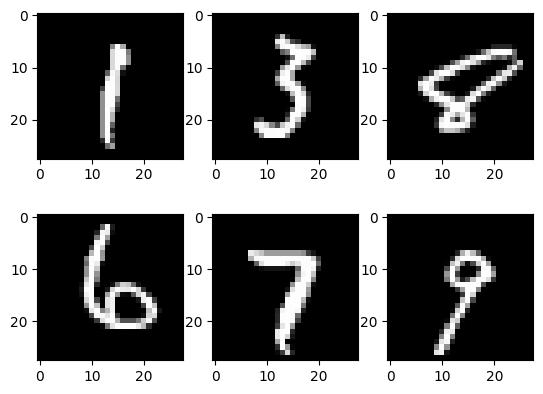

In [31]:
# ploat the data
plot_image(example_data)

In [44]:
## Neural Net
import torch.nn as nn
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no sofmax function as we will use CrossEntropy that will add sofmax internally
        return out

In [40]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learnig_rate)

In [41]:
## traning loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100 1 28 28
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # update the grad

        if((i+1) % 100 == 0):
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')



Epoch [1/2], Step [100/600], Loss: 0.3691
Epoch [1/2], Step [200/600], Loss: 0.1773
Epoch [1/2], Step [300/600], Loss: 0.2615
Epoch [1/2], Step [400/600], Loss: 0.2307
Epoch [1/2], Step [500/600], Loss: 0.1630
Epoch [1/2], Step [600/600], Loss: 0.1624
Epoch [2/2], Step [100/600], Loss: 0.1256
Epoch [2/2], Step [200/600], Loss: 0.0736
Epoch [2/2], Step [300/600], Loss: 0.0798
Epoch [2/2], Step [400/600], Loss: 0.0787
Epoch [2/2], Step [500/600], Loss: 0.1071
Epoch [2/2], Step [600/600], Loss: 0.0513


In [42]:
with torch.no_grad():
    num_corrects = 0
    num_samples = 0

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
         # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        num_samples += labels.size(0)
        num_corrects += (predicted == labels).sum().item()

    acc = 100.0 * num_corrects / num_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.35 %
